<a href="https://colab.research.google.com/github/riyaa14/BrainDead_Hackathon/blob/main/CLIP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import torch,json, os
from PIL import Image

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data_dir = '/kaggle/input/facebook-hateful-meme-dataset/data/'

In [ ]:
img_path = data_dir + "data_dir"
train_path = data_dir + "train.jsonl"
dev_path = data_dir + "dev.jsonl"
test_path = data_dir + "test.jsonl"

In [ ]:
class HatefulMemesDataset(torch.utils.data.Dataset):
    def __init__(self, data_path):
        self.data = [json.loads(l) for l in open(data_path)]
        self.data_dir = os.path.dirname(data_path)

    def __getitem__(self, index: int):
        # Load images on the fly.
        image = Image.open(os.path.join(self.data_dir, self.data[index]["img"])).convert("RGB")
        text = self.data[index]["text"]
        label = self.data[index]["label"]

        return image, text, label

    def load_image_only(self, index: int):
        image = Image.open(os.path.join(self.data_dir, self.data[index]["img"])).convert("RGB")
        return image

    def get_label(self, index: int):
        label = self.data[index]["label"]
        return label

    def get_test_item(self, index: int):
        # Load images on the fly.
        image = Image.open(os.path.join(self.data_dir, self.data[index]["img"])).convert("RGB")
        text = self.data[index]["text"]

        return image, text


    def __len__(self):
        return len(self.data)

In [ ]:
train_data = HatefulMemesDataset(train_path)
val_data = HatefulMemesDataset(dev_path)
test_data = HatefulMemesDataset(test_path)

print('Data size of training data: %d samples' % len(train_data))
print('Data size of validation data: %d samples' % len(val_data))
print('Data size of test data: %d samples' % len(test_data))

Data size of training data: 8500 samples
Data size of validation data: 500 samples
Data size of test data: 1000 samples


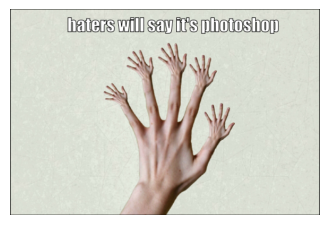

haters will say it's photoshop
0


In [ ]:
import matplotlib.pyplot as plt
sample_memeID = 300
img, text, label = val_data[sample_memeID]

# Show input image.
plt.figure(figsize=(4,5));plt.imshow(img); plt.axis(False);plt.show()

# Show input plot (untokenized).
print(text)
print(label)

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 939.7 kB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-_m6ehhg1
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-_m6ehhg1
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import numpy as np
import torch
from pkg_resources import packaging

print("Torch version:", torch.__version__)

Torch version: 2.2.1+cu121


In [ ]:
import clip
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
device = "cpu"  # Use CPU only
model, preprocess = clip.load("ViT-B/32", device)
model.eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 94.2MiB/s]


Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


In [ ]:
descriptions = {
      'good meme': 'a nonhateful meme ',
      'hateful meme': 'a hateful meme based on race, nationality, religion or disability'
}
text_labels = [descriptions['good meme'],descriptions['hateful meme']]
text_tokens = clip.tokenize([desc for desc in text_labels]).to(device)

with torch.no_grad():
    F_text_features = model.encode_text(text_tokens).float()

F_text_features /= F_text_features.norm(dim=-1, keepdim=True)

In [ ]:
similarity_threshold = 0.1

In [ ]:
ground_truth = []
predicted = []
for i in range(len(val_data)):
    image, text, label  = val_data[i]
    if(label):
        text = text + " 1111111111"
    else:
        text = text + " 0000000000"
    ground_truth.append(label)
    image_input = preprocess(image).unsqueeze(0).to(device)
    text_input = clip.tokenize(text).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
        text_features = model.encode_text(text_input).float()

    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = image_features.cpu().numpy() @ text_features.cpu().numpy().T

    if similarity < similarity_threshold:
        predicted_label = 0
        predicted.append(predicted_label)
    else:
        hate_similarity = (image_features.cpu() @ F_text_features.cpu().T).softmax(dim=-1)
        if hate_similarity[0][0] > hate_similarity[0][1]:
            predicted_label = 0
            predicted.append(predicted_label)
        else:
            predicted_label = 1
            predicted.append(predicted_label)

In [ ]:
#Calculate accuracy
total_predictions = np.array(predicted)
total_ground_truth =  np.array(ground_truth)
accuracy = np.mean((total_predictions == total_ground_truth).astype(np.float64)) * 100
print('The accuracy of the model is %.2f' % (accuracy)+'%')
from sklearn.metrics import roc_auc_score, roc_curve

# y_true: true labels, y_score: predicted scores
fpr, tpr, thresholds = roc_curve(total_ground_truth, total_predictions)
roc_auc = roc_auc_score(total_ground_truth, total_predictions)

print("AOC-ROC score: {:.2f}".format(roc_auc))

The accuracy of the model is 59.80%
AOC-ROC score: 0.60


In [ ]:
test_data.get_test_item(0)

(<PIL.Image.Image image mode=RGB size=283x400>, 'handjobs sold seperately')

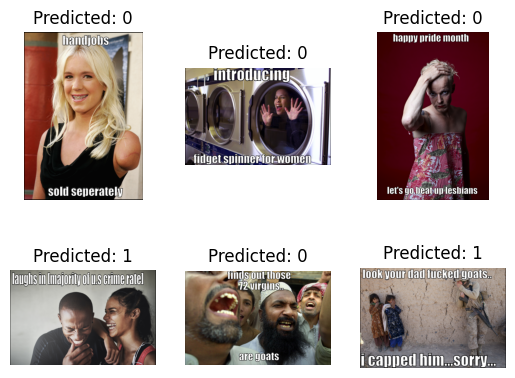

In [ ]:
import matplotlib.pyplot as plt

# Define a list to store selected examples
selected_examples = []

# Iterate through the first 5 samples in the test dataset
for i in range(6):
    image, text = test_data.get_test_item(i)

    # Preprocess text
    text += " 1111111111"  # Assuming all labels are positive for demonstration purposes

    # Encode image and text features
    image_input = preprocess(image).unsqueeze(0).to(device)
    text_input = clip.tokenize(text).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
        text_features = model.encode_text(text_input).float()

    # Calculate similarity score
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = image_features.cpu().numpy() @ text_features.cpu().numpy().T

    # Make predictions based on similarity score
    if similarity < similarity_threshold:
        predicted_label = 0
    else:
        hate_similarity = (image_features.cpu() @ F_text_features.cpu().T).softmax(dim=-1)
        predicted_label = 0 if hate_similarity[0][0] > hate_similarity[0][1] else 1

    # Append predicted label along with image to selected_examples
    selected_examples.append((image, predicted_label))

# Display selected examples
for idx, (image, predicted_label) in enumerate(selected_examples):
    plt.subplot(2, 3, idx+1)
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.show()